# Goal

The goal is to create a simple implementation of neural networks. Below are steps we take:
1. implemeting a Value class which records values, gradients, and does backword/foward propagationmanually
2. using pytorch to validate our Value class
3. create Neuron, Layer, and MLP classes to fully implement a Neural Net

In [141]:
%reset -f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [142]:
import numpy as np
from viz import draw_dot
from Value import Value

# Examples of Using Value Class

In [73]:
# inputs x1, x2
x1 = Value(data=2.0, label='x1')
x2 = Value(data=0.0, label='x2')

# weights w1, w2 (parameters)
w1 = Value(data=-3.0, label='w1')
w2 = Value(data=1.0, label='w2')

# bias of the neuron
b = Value(6.8813735870195432, label='b')

# w1x2 + w2x2 + b
w1x1 = w1 * x1; w1x1.label = 'w1*x1'
w2x2 = w2 * x2; w2x2.label = 'w2*x2'
w1x1w2x2 = w1x1 + w2x2; w1x1w2x2.label = 'w1*x1 + w2*x2'
n = w1x1w2x2 + b; n.label='n'
o = n.tanh(); o.label='o'

# backward propagation
o.backward()

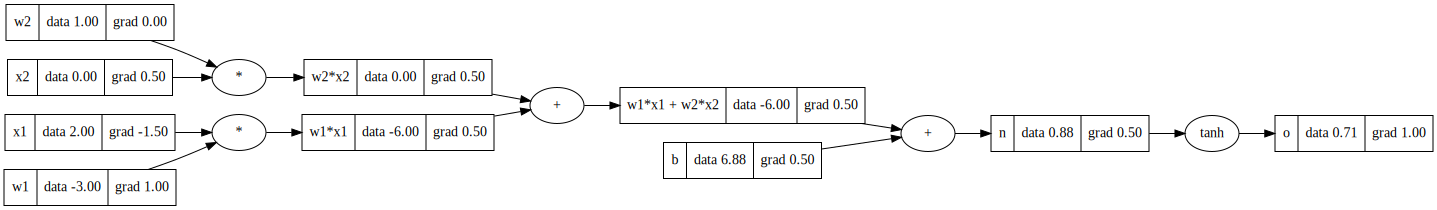

In [74]:
draw_dot(o)

# pytorch

In [129]:
import torch

# pytorch helps us keeping data in tensor format.
# this will make computations very efficient.

In [94]:
# a very basic example

x = torch.Tensor([[1.0, 3, 4], [2.0, 6, 3]])
x, x.size()

(tensor([[1., 3., 4.],
         [2., 6., 3.]]),
 torch.Size([2, 3]))

In [120]:
x1 = torch.Tensor([2.0]).double(); x1.requires_grad=True # to keep at float64; by default, assumes nodes (data) have no grad
x2 = torch.Tensor([0.0]).double(); x2.requires_grad=True
w1 = torch.Tensor([-3.0]).double(); w1.requires_grad=True
w2 = torch.Tensor([1.0]).double(); w2.requires_grad=True
b = torch.Tensor([6.8813735870195432]).double(); b.requires_grad=True

n = w1 * x1 + w2 * x2 + b
o = torch.tanh(n)

In [121]:
# it's a tensor object
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [122]:
# same thing
o.item(), o.data.item()

(0.7071066904050358, 0.7071066904050358)

In [125]:
o.backward()

In [126]:
o

tensor([0.7071], dtype=torch.float64, grad_fn=<TanhBackward0>)

In [127]:
x1, x1.item, x1.grad.item()

(tensor([2.], dtype=torch.float64, requires_grad=True),
 <function Tensor.item>,
 -1.5000003851533106)

In [128]:
for t in [x1, x2, w1, w2]:
    print(f"value={t.data.item()}, grad={t.grad.item()}")

value=2.0, grad=-1.5000003851533106
value=0.0, grad=0.5000001283844369
value=-3.0, grad=1.0000002567688737
value=1.0, grad=0.0


# Neuron, Layer, and MLP (Multilayer perceptron)

The picture below is an MLP with 3 inputes, three hidden layers of output each with 4 nodes, and one final ouput

[3, [4, 4, 4, 1]]

Let's implement this by:
1. implemeting Neuron
2. implementing layer
3. implementing list of layes (MLP)

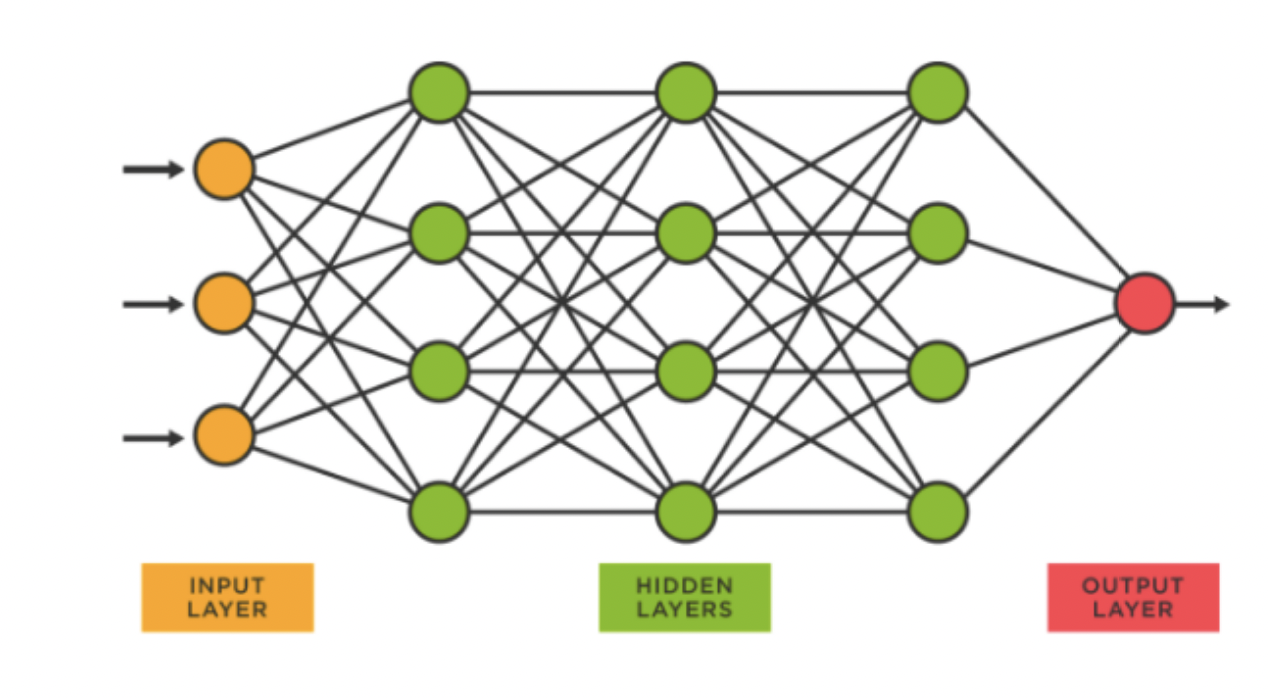

In [181]:
from MLP import Neuron, Layer, MLP

In [186]:
# Neuron example

# creating a neuron with 3 inputs
n = Neuron(3)

print(n.w, n.b)

# defining input data
x=[1, 2, 3]


# forawrd pass
n(x)

[Value(data=0.214137390315563), Value(data=0.286198886819095), Value(data=-0.5068226072388258)] Value(data=-0.3363333763454306)


Value(data=-0.7895614285177848)

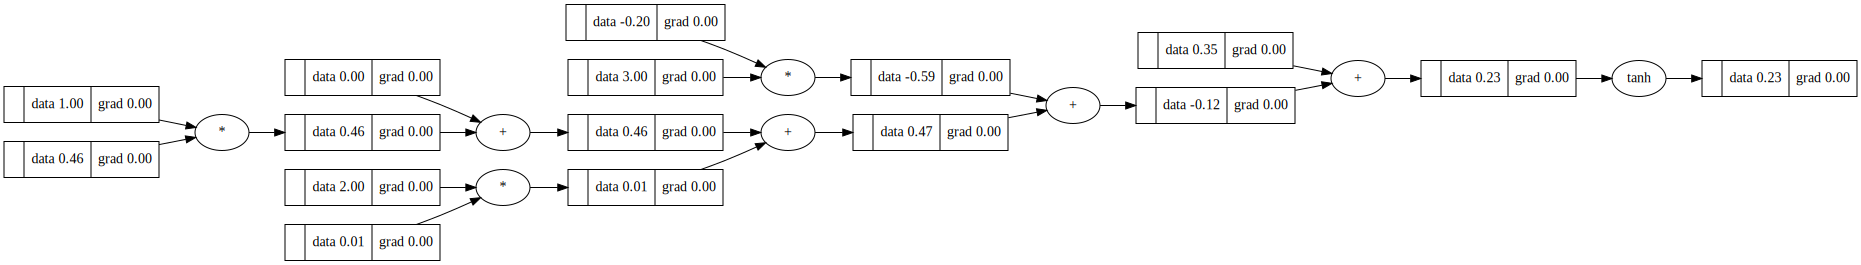

In [183]:
draw_dot(n(x))

In [246]:
# Layer example

# creating a layer 4 neurons, each having 3 inputs
l = Layer(3, 4)

print(l.neurons[0].w, l.neurons[0].b)

# defining inputs
x = [1, 2, 3]

# forward pass, for all 4 neurons
l(x)

[Value(data=-0.6357854857893992), Value(data=-0.3956123158558673), Value(data=0.9847384142023405)] Value(data=-0.5606562668272841)


[Value(data=0.7471837879688894),
 Value(data=-0.7643952147684456),
 Value(data=-0.42740771388176096),
 Value(data=0.9988344405986211)]

In [249]:
# MLP example
mlp = MLP(3, [4, 1])

# defining inputs
x = [1, 2, 3]

# forward pass, for all 4 neurons
mlp(x)

Value(data=0.8026516953272141)

In [256]:
mlp.parameters()

[Value(data=-0.23900032686327188),
 Value(data=0.8497315202375033),
 Value(data=-0.626621424409028),
 Value(data=-0.7550933028158016),
 Value(data=0.39388882258260693),
 Value(data=-0.27836201520902115),
 Value(data=0.9671096434861741),
 Value(data=0.052228911004590595),
 Value(data=-0.8533155785213853),
 Value(data=-0.23094227080361596),
 Value(data=0.6870497598544456),
 Value(data=-0.42928297391805925),
 Value(data=0.09733038144238604),
 Value(data=-0.19784026528185672),
 Value(data=-0.8633801234739791),
 Value(data=0.624642092828698),
 Value(data=-0.18711814891126233),
 Value(data=-0.6707749507294412),
 Value(data=0.2543566525494656),
 Value(data=-0.5563678862461199),
 Value(data=-0.9689102381612269)]

In [252]:
len(mlp.parameters())

21

# Real Example

In [313]:
# real example: and operator
xs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]

ys = [0, 1, 1, 0]

# define our neural net structure
n = MLP(nin=2, nouts=[3, 3, 1])

In [314]:
STEP = 0.05
loss = []
for iter in range(1000):
    # forward pass
    ypred = [n(x) for x in xs]    
    lossfunc = sum([(_ys - _ypred) ** 2 for _ys, _ypred in zip(ys, ypred)])
    loss.append(lossfunc)
    # backward pass
    for p in n.parameters(): # grad_zero
        p.grad = 0    
    lossfunc.backward()

    # parameter updates
    for p in n.parameters():
        p.data -= STEP * p.grad
        p.grad = 0

    # log
    print(f"iter={iter} | loss={lossfunc}")

iter=0 | loss=Value(data=9.230699716559572)
iter=1 | loss=Value(data=8.499500777444602)
iter=2 | loss=Value(data=5.89496388197)
iter=3 | loss=Value(data=2.6239387396537355)
iter=4 | loss=Value(data=1.3349476049880757)
iter=5 | loss=Value(data=1.1283709138799791)
iter=6 | loss=Value(data=1.0801160841946211)
iter=7 | loss=Value(data=1.0436000933954845)
iter=8 | loss=Value(data=1.0113401345615673)
iter=9 | loss=Value(data=0.9822605665247915)
iter=10 | loss=Value(data=0.9560191713809711)
iter=11 | loss=Value(data=0.9323175160299613)
iter=12 | loss=Value(data=0.9108200592163023)
iter=13 | loss=Value(data=0.8911704663311977)
iter=14 | loss=Value(data=0.8730172626944057)
iter=15 | loss=Value(data=0.856032326665811)
iter=16 | loss=Value(data=0.8399209010621691)
iter=17 | loss=Value(data=0.8244251917818721)
iter=18 | loss=Value(data=0.8093239390046497)
iter=19 | loss=Value(data=0.7944298273464365)
iter=20 | loss=Value(data=0.7795859709616225)
iter=21 | loss=Value(data=0.7646622025071033)
iter=2

In [315]:
ys, ypred

([0, 1, 1, 0],
 [Value(data=0.000894677746339294),
  Value(data=0.9818127928949681),
  Value(data=0.9745429293783338),
  Value(data=0.000934294585170526)])

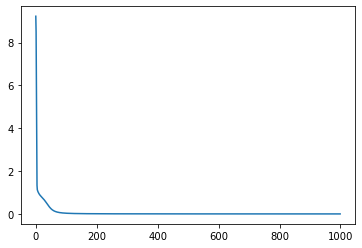

In [323]:
from matplotlib import pyplot as plt

plt.plot([l.data for l in loss])

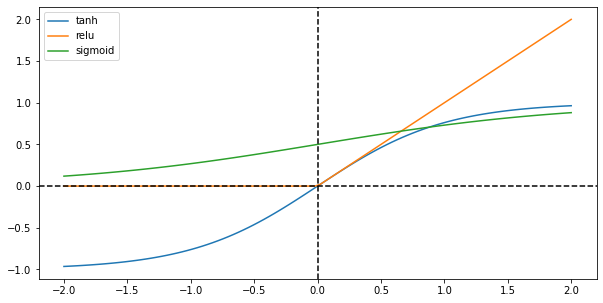

In [343]:
# Relu, tanh, sigmoid
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 5))
x = np.linspace(-2, 2, 100)
sns.lineplot(x=x, y=np.tanh(x), label='tanh')
sns.lineplot(x=x, y=np.maximum(0.0, x), label='relu')
sns.lineplot(x=x, y=np.exp(x) / (1 + np.exp(x)), label='sigmoid')
plt.axvline(x=0.0, color='black', linestyle='dashed')
plt.axhline(y=0.0, color='black', linestyle='dashed')
plt.show()